In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.image import mean_img, index_img

In [2]:
anat = nib.load(r'E:\python in neuroimaging\sub2\anat\sub-02_ses-mri_acq-mprage_T1w.nii')
run1 = nib.load(r'E:\python in neuroimaging\sub2\func\run1\swarsub-02_ses-mri_task-facerecognition_run-01_bold.nii')
run2 = nib.load(r'E:\python in neuroimaging\sub2\func\run2\swarsub-02_ses-mri_task-facerecognition_run-02_bold.nii')

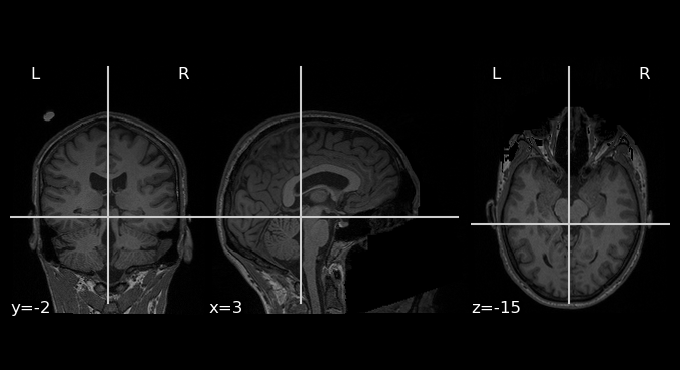

In [3]:
plotting.plot_anat(anat)
#_anat for anatomical

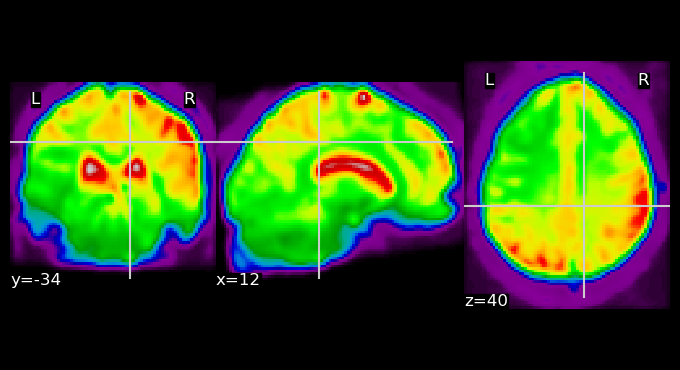

In [4]:
plotting.plot_epi(mean_img(run1))
#_epi for epi images

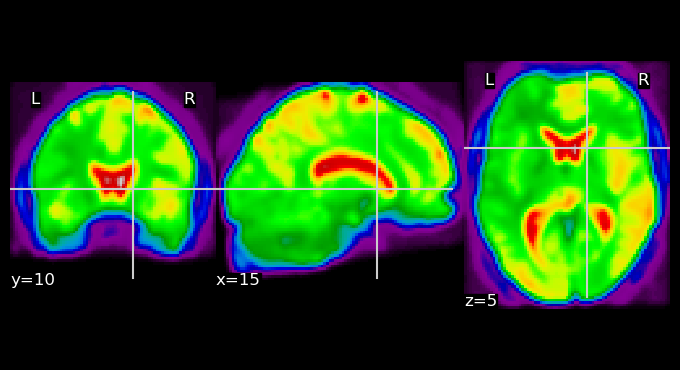

In [5]:
plotting.plot_epi(mean_img(run1), cut_coords = [15,10,5])
#cut coords: views cutted according to specified coordinations

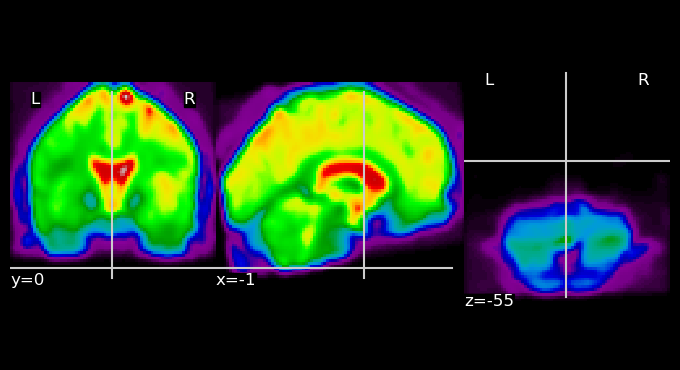

In [6]:
plotting.plot_epi(mean_img(run1), cut_coords = [-1,0,-55])
#minus coordinates

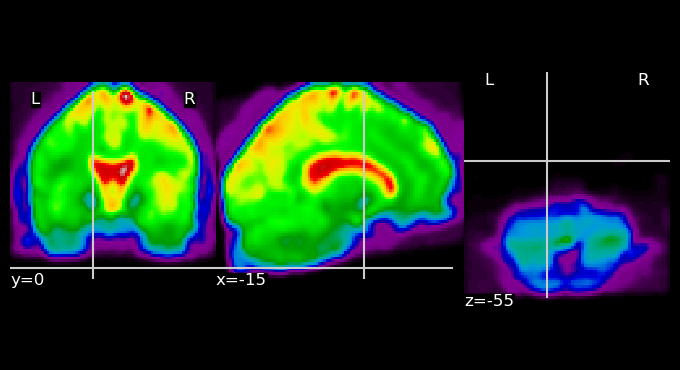

In [7]:
plotting.plot_epi(mean_img(run1), cut_coords = [-15,0,-55])
#minus coordinates, i dont understand how coordinates work

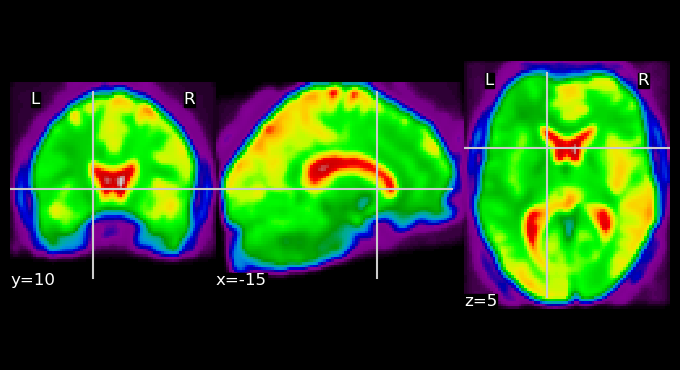

In [8]:
plotting.plot_epi(mean_img(run1), cut_coords = [-15,10,5], display_mode = 'ortho')
#dislplay_mode = ortho : default display mode

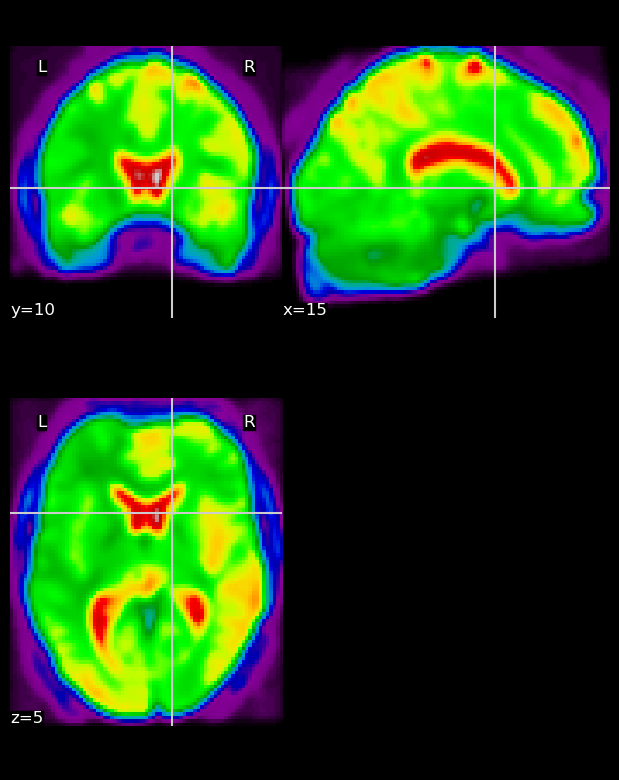

In [9]:
plotting.plot_epi(mean_img(run1), cut_coords = [15,10,5], display_mode = 'tiled')
#dislplay_mode = tiled : cut are arranged in a 2x2 grid


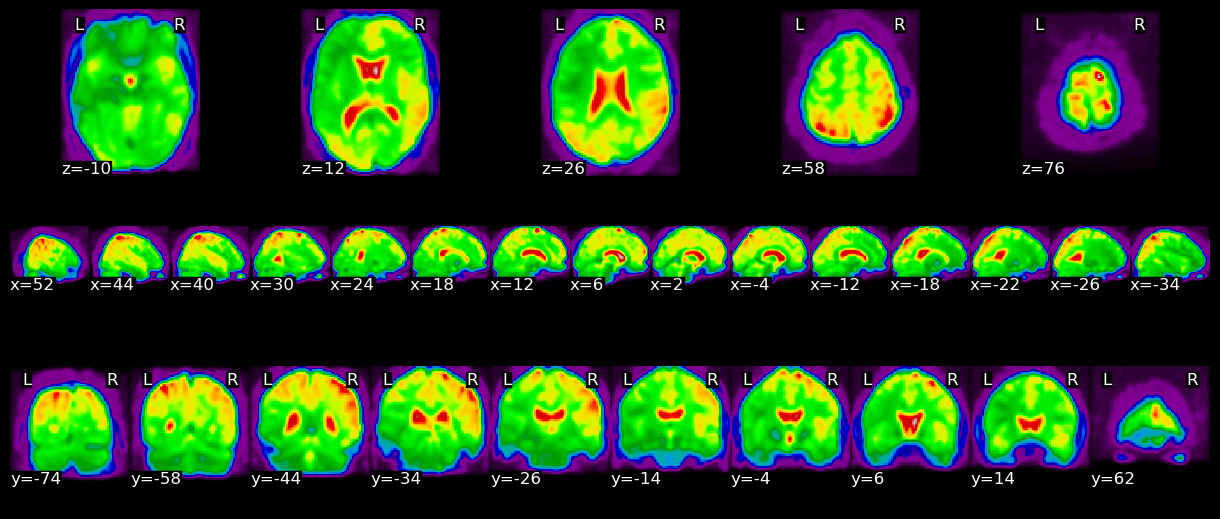

In [10]:
plotting.plot_epi(mean_img(run1), cut_coords = [15,10,5], display_mode = 'mosaic')
#dislplay_mode = mosaic : three cuts are performed along multiple rows and columns

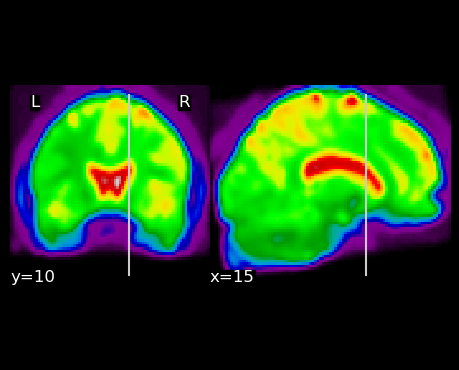

In [11]:
plotting.plot_epi(mean_img(run1), cut_coords = [15,10], display_mode = 'yx')

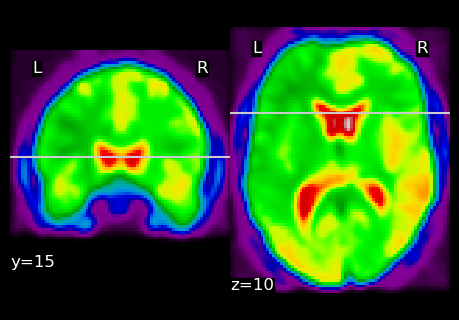

In [12]:
plotting.plot_epi(mean_img(run1), cut_coords = [15,10], display_mode = 'yz')

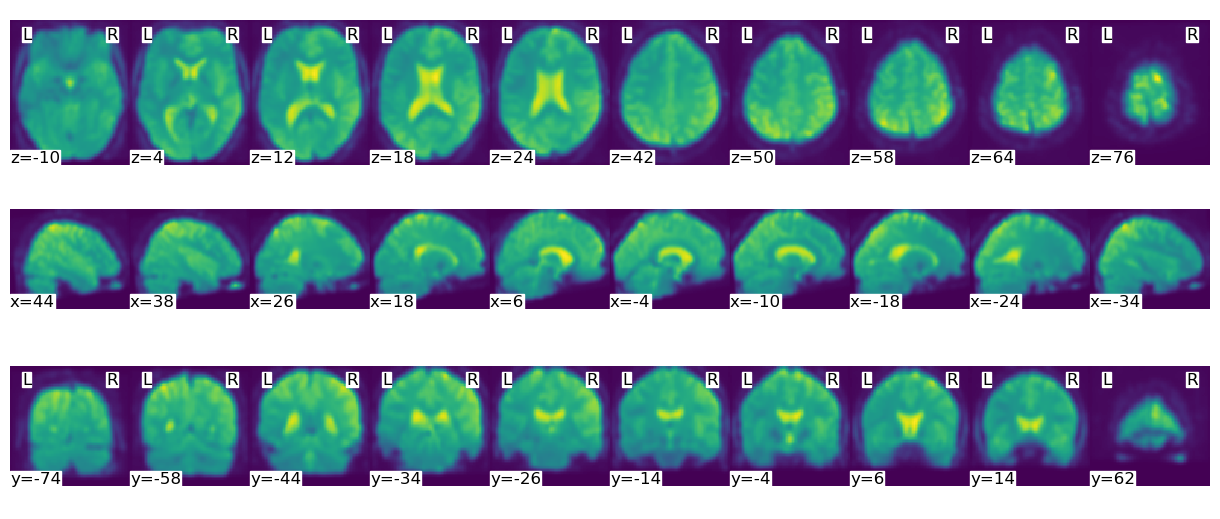

In [13]:
plotting.plot_img(mean_img(run1), cut_coords = [10,10,10], display_mode = 'mosaic')
#plotting.plot_img instead of _epi

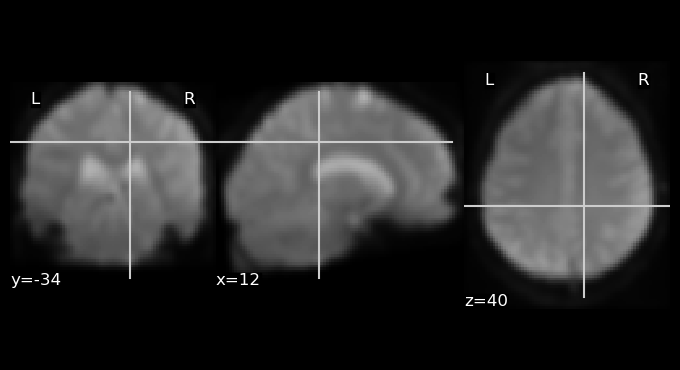

In [14]:
plotting.plot_anat(mean_img(run1))
#plotting.plot_anat instead of _epi

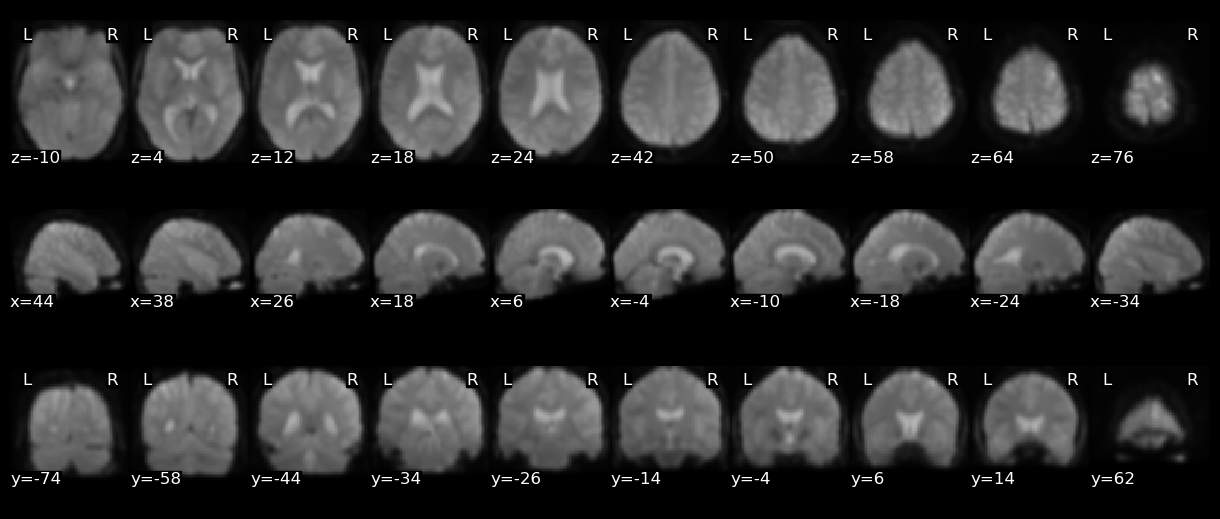

In [15]:
plotting.plot_anat(mean_img(run1), cut_coords = [10,10,10], display_mode = 'mosaic')
#plotting.plot_anat instead of _epi

In [16]:
volume_1 = index_img(run1, 1)
#indexing 4d time series

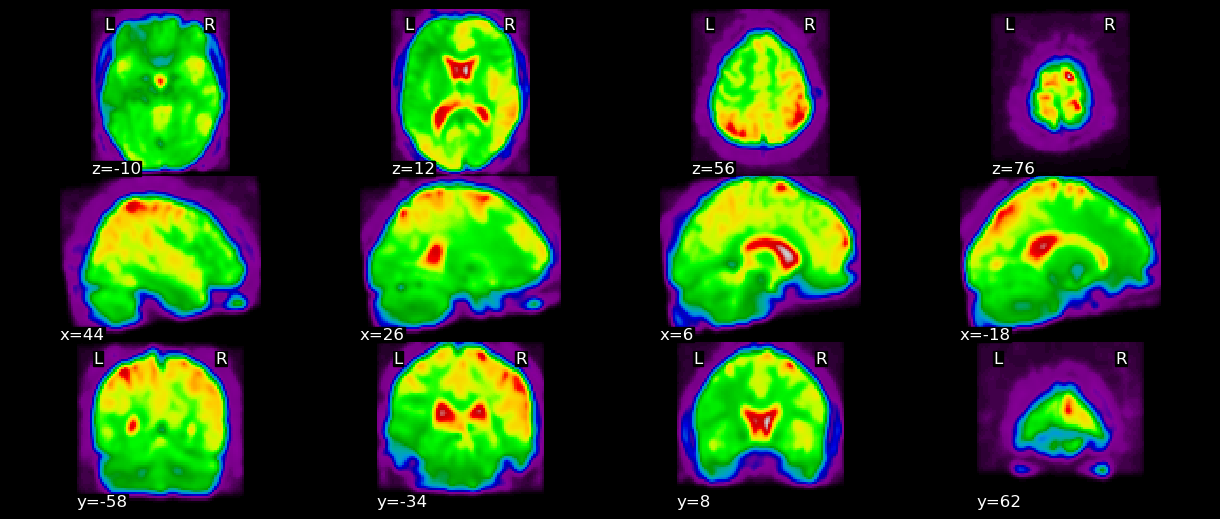

In [17]:
plotting.plot_epi(volume_1, cut_coords = [4,4,4], display_mode = 'mosaic')


In [18]:
print(run1.header)
#what is dim? why is it 8 numbers?

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  79  95  79 208   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  2.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Warped - conv(6,6,7.5)'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 78.0
qoffset_y       : -112.0
qoffset_z       : -70.0
srow_x          : [

In [ ]:
run1_data = run1.get_fdata()
run2_data = run2.get_fdata()
#For either type of image (array or proxy) you can always get the data with the get_fdata() method.
#For the array image, get_fdata() just returns the data array,
#if it’s already the required floating point type (default 64-bit float).
#If it isn’t that type, get_fdata() casts it to one:
#in order to plot time series of a single voxel instead of carpetplot, we have to get fdata of run, in the numpy package

In [ ]:
run1_data.shape
#lenght of axes for image in each dimension

In [ ]:
run1_data[9,36,7,:]
#time series of voexl 9,36,7 fore ':' whole time of run (208s)
#there is 220 numbers, why?

In [ ]:
plt.plot(run1_data[9,36,7,:])
plt.title(f'Time Series of Voxel (9,36,7)')
plt.xlabel('Time')
plt.ylabel('Grey Level')
plt.show()

In [ ]:
plotting.plot_carpet(run1,t_r = 2)
#Plot an image representation of voxel intensities across time.
#why 410 seconds?each run is 208 seconds

In [ ]:
print(run2.header)


In [ ]:
run2.affine
#the affine array stores the relationship between voxel coordinates
#in the image data array and coordinates in the reference space.
#diameter corresponds to magnefication of real image, when it is negative it means image i rotated

In [ ]:
tr = 2.0  
n_scans = run1.shape[3] 
frame_times = np.arange(n_scans) * tr  
#idk whwt is this?

In [ ]:
plt.plot(run2_data[63,63,33,:])
plt.title(f'Time Series of Voxel (63,63,33)')
plt.xlabel('Time')
plt.ylabel('Grey Level')
plt.show()

In [ ]:
events1= pd.read_table(r'E:\python in neuroimaging\sub2\func\run1\sub-02_ses-mri_task-facerecognition_run-01_events.tsv')
events2= pd.read_table(r'E:\python in neuroimaging\sub2\func\run2\sub-02_ses-mri_task-facerecognition_run-02_events.tsv')


In [ ]:
events1


In [ ]:
events1.rename(columns={'stim_type': 'trial_type'}, inplace=True)
events2.rename(columns={'stim_type': 'trial_type'}, inplace=True)
#renaming stim type with trial type

In [ ]:
events2=events2.dropna()
#removing na from events 2

In [ ]:
events1['trial_type'] = events1['trial_type'].fillna('rest')
events1
#replacing na to rest for run1

In [ ]:
events2


In [ ]:
events1 = events1[['onset', 'duration', 'trial_type']]
events2 = events2[['onset', 'duration', 'trial_type']]

In [ ]:
plotting.plot_event([events1 , events2], figsize = (15,5))
plt.show()